In [131]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [132]:
pd.set_option('display.max_columns', None)

In [133]:
#Carga desde un archivo .csv sin indice y eliminar filas innecesarias
Mexico = pd.read_csv("Listings Final Mexico.csv", on_bad_lines='skip')
Mexico

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,898633,https://www.airbnb.com/rooms/898633,20240627045222,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,The LOCATION is undoubtedly THE BIG advantage ...,The hipster Roma neighborhood embodies a color...,https://a0.muscache.com/pictures/ba75b1c1-cb02...,4796027,https://www.airbnb.com/users/show/4796027,Marco,2013-01-21,"Mexico City, Mexico","I'm Marco. I am a graphic designer, but I also...",within an hour,100%,88%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Roma Norte,3,6,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Cuauhtémoc,NaN,19.420630,-99.165860,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""40 inch HDTV with Amazon Prime Video, Netfli...","$1,652.00",3,48,3,3,48,48,3.0,48.0,NaN,t,0,5,23,262,2024-06-28,56,3,0,2013-03-30,2024-04-17,4.95,4.93,4.95,4.93,4.96,4.93,4.91,NaN,f,3,2,1,0,0.41
1,35797,https://www.airbnb.com/rooms/35797,20240627045222,2024-06-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",a few days or more,0%,NaN,f,https://a0.muscache.com/im/pictures/user/00de1...,https://a0.muscache.com/im/pictures/user/00de1...,NaN,1,1,"['email', 'phone', 'work_email']",t,t,"Mexico City, D.f., Mexico",Cuajimalpa de Morelos,NaN,19.382830,-99.271780,Entire villa,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...","$3,663.00",1,7,1,1,7,7,1.0,7.0,NaN,t,28,58,88,363,2024-06-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,44616,https://www.airbnb.com/rooms/44616,20240627045222,2024-06-28,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus offers independent studios and ...,within an hour,100%,92%,t,https://a0.muscache.com/im/users/196253/profil...,https://a0.muscache.com/im/users/196253/profil...,Condesa,17,17,"['email', 'phone', 'work_email']",t,t,NaN,Cuauhtémoc,NaN,19.411620,-99.177940,Entire home,Entire home/apt,14,5.5,5.5 baths,5.0,8.0,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...","$18,000.00",1,365,1,1,365,365,1.0,365.0,NaN,t,29,59,89,364,2024-06-28,64,0,0,2011-11-09,2023-03-26,4.58,4.56,4.70,4.87,4.78,4.98,4.48,NaN,f,13,4,2,0,0.42
3,913084,https://www.airbnb.com/rooms/913084,20240627045222,2024-06

In [134]:
#Convertir la variable price a numerico
Mexico['price'] = Mexico['price'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_33224\1008147510.py:2: SyntaxWarning: invalid escape sequence '\$'
  Mexico['price'] = Mexico['price'].replace('[\$,]', '', regex=True).astype(float)


In [135]:
Mexico['host_acceptance_rate'] = Mexico['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\%'
<>:1: SyntaxWarning: invalid escape sequence '\%'
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_33224\2093985810.py:1: SyntaxWarning: invalid escape sequence '\%'
  Mexico['host_acceptance_rate'] = Mexico['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)


In [136]:
Mexico['host_total_listings_count'] = Mexico['host_total_listings_count'].astype(float)

In [137]:
#Convertir la host_response_rate price a numerico
Mexico['host_response_rate'] = Mexico['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\%'
<>:2: SyntaxWarning: invalid escape sequence '\%'
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_33224\1757207178.py:2: SyntaxWarning: invalid escape sequence '\%'
  Mexico['host_response_rate'] = Mexico['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)


In [138]:
#Identificar valores nulos por columna
Valores_Nulos= Mexico.isnull().sum()
Columnas_Con_Nulos = Valores_Nulos[Valores_Nulos > 0]
Columnas_Con_Nulos

description                       951
neighborhood_overview           10290
host_location                    5606
host_about                      11182
host_response_time               4197
host_response_rate               4197
host_acceptance_rate             2855
host_is_superhost                1543
host_neighbourhood              13355
neighbourhood                   10290
neighbourhood_group_cleansed    26536
bathrooms                        3129
bathrooms_text                     25
bedrooms                         1071
beds                             3164
price                            3198
calendar_updated                26536
has_availability                 1036
first_review                     3872
last_review                      3872
review_scores_rating             3872
review_scores_accuracy           3887
review_scores_cleanliness        3888
review_scores_checkin            3887
review_scores_communication      3887
review_scores_location           3887
review_score

In [139]:
#Información tipos de columnas
Tipos_Columnas = Mexico[Columnas_Con_Nulos.index].dtypes
Columnas_Object = Tipos_Columnas[Tipos_Columnas == 'object']
Columnas_Object

description              object
neighborhood_overview    object
host_location            object
host_about               object
host_response_time       object
host_is_superhost        object
host_neighbourhood       object
neighbourhood            object
bathrooms_text           object
has_availability         object
first_review             object
last_review              object
dtype: object

In [140]:
#Información tipos de columnas
Tipos_Columnas = Mexico[Columnas_Con_Nulos.index].dtypes
Columnas_Object = Tipos_Columnas[Tipos_Columnas == 'float']
Columnas_Object

host_response_rate              float64
host_acceptance_rate            float64
neighbourhood_group_cleansed    float64
bathrooms                       float64
bedrooms                        float64
beds                            float64
price                           float64
calendar_updated                float64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64
license                         float64
reviews_per_month               float64
dtype: object

In [141]:
#Realizamos una copia del dataframe
copia_Mexico = Mexico.copy()

In [142]:
#Sustituir valores nulos por un string en  concreto
copia_Mexico["description"] = copia_Mexico["description"].fillna("DESCRIPCIÓN FALTANTE")
copia_Mexico["neighborhood_overview"] = copia_Mexico["neighborhood_overview"].fillna("SIN INFORMACIÓN")
copia_Mexico["host_name"] = copia_Mexico["host_name"].fillna("ANONIMO")
copia_Mexico["host_location"] = copia_Mexico["host_location"].fillna("SIN INFORMACIÓN")
copia_Mexico["host_about"] = copia_Mexico["host_about"].fillna("SIN INFORMACIÓN")
copia_Mexico["host_response_time"] = copia_Mexico["host_response_time"].fillna("SIN INFORMACIÓN")
copia_Mexico["host_is_superhost"] = copia_Mexico["host_is_superhost"].fillna("VALIDACIÓN PENDIENTE")
copia_Mexico["host_neighbourhood"] = copia_Mexico["host_neighbourhood"].fillna("SIN INFORMACIÓN")
copia_Mexico["host_verifications"] = copia_Mexico["host_verifications"].fillna("VALIDACIÓN PENDIENTE")
copia_Mexico["host_identity_verified"] = copia_Mexico["host_identity_verified"].fillna("VALIDACIÓN PENDIENTE")
copia_Mexico["neighbourhood"] = copia_Mexico["neighbourhood"].fillna("SIN INFORMACIÓN")
copia_Mexico["neighbourhood_group_cleansed"] = copia_Mexico["neighbourhood_group_cleansed"].fillna("SIN INFORMACIÓN")
copia_Mexico["room_type"] = copia_Mexico["room_type"].fillna("INFORMACIÓN FALTANTE")
copia_Mexico["accommodates"] = copia_Mexico["accommodates"].fillna("INFORMACIÓN FALTANTE")
copia_Mexico["bathrooms"] = copia_Mexico["bathrooms"].fillna("INFORMACIÓN FALTANTE")
copia_Mexico["bathrooms_text"] = copia_Mexico["bathrooms_text"].fillna("INFORMACIÓN FALTANTE")
copia_Mexico["bedrooms"] = copia_Mexico["bedrooms"].fillna("INFORMACIÓN FALTANTE")
copia_Mexico["amenities"] = copia_Mexico["amenities"].fillna("INFORMACIÓN FALTANTE")
copia_Mexico["maximum_nights"] = copia_Mexico["maximum_nights"].fillna("NO DEFINIDO")
copia_Mexico["minimum_minimum_nights"] = copia_Mexico["minimum_minimum_nights"].fillna("NO DEFINIDO")
copia_Mexico["calendar_updated"] = copia_Mexico["calendar_updated"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["has_availability"] = copia_Mexico["has_availability"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["availability_30"] = copia_Mexico["availability_30"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["availability_60"] = copia_Mexico["availability_60"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["availability_90"] = copia_Mexico["availability_90"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["availability_365"] = copia_Mexico["availability_365"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["calendar_last_scraped"] = copia_Mexico["calendar_last_scraped"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["number_of_reviews"] = copia_Mexico["number_of_reviews"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["number_of_reviews_ltm"] = copia_Mexico["number_of_reviews_ltm"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["first_review"] = copia_Mexico["first_review"].fillna("SIN RESEÑA")
copia_Mexico["last_review"] = copia_Mexico["last_review"].fillna("SIN RESEÑA")
copia_Mexico["review_scores_rating"] = copia_Mexico["review_scores_rating"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["review_scores_cleanliness"] = copia_Mexico["review_scores_cleanliness"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["review_scores_location"] = copia_Mexico["review_scores_location"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["instant_bookable"] = copia_Mexico["instant_bookable"].fillna("INFORMACIÓN NO DISPONIBLE")

In [143]:
#Sustituir valores nulos con promedio o media
copia_Mexico["host_response_rate"] = copia_Mexico["host_response_rate"].fillna(round(copia_Mexico["host_response_rate"].mean(), 1))
copia_Mexico["host_total_listings_count"] = copia_Mexico["host_total_listings_count"].fillna(round(copia_Mexico["host_response_rate"].mean(), 1))
copia_Mexico["host_acceptance_rate"] = copia_Mexico["host_acceptance_rate"].fillna(round(copia_Mexico["minimum_nights"].mean(), 1))
copia_Mexico["minimum_nights"] = copia_Mexico["minimum_nights"].fillna(round(copia_Mexico["minimum_nights"].mean(), 1))
copia_Mexico["maximum_maximum_nights"] = copia_Mexico["maximum_maximum_nights"].fillna(round(copia_Mexico["maximum_maximum_nights"].mean(), 1))
copia_Mexico["maximum_nights_avg_ntm"] = copia_Mexico["maximum_nights_avg_ntm"].fillna(round(copia_Mexico["maximum_nights_avg_ntm"].mean(), 1))
copia_Mexico["number_of_reviews_l30d"] = copia_Mexico["number_of_reviews_l30d"].fillna(round(copia_Mexico["number_of_reviews_l30d"].mean(), 1))
copia_Mexico["review_scores_accuracy"] = copia_Mexico["review_scores_accuracy"].fillna(round(copia_Mexico["review_scores_accuracy"].mean(), 1))
copia_Mexico["review_scores_checkin"] = copia_Mexico["review_scores_checkin"].fillna(round(copia_Mexico["review_scores_checkin"].mean(), 1))
copia_Mexico["price"] = copia_Mexico["price"].fillna(round(copia_Mexico["price"].mean(), 1))
copia_Mexico["review_scores_communication"] = copia_Mexico["review_scores_communication"].fillna(round(copia_Mexico["review_scores_communication"].mean(), 1))
copia_Mexico["review_scores_value"] = copia_Mexico["review_scores_value"].fillna(round(copia_Mexico["review_scores_value"].mean(), 1))
copia_Mexico["calculated_host_listings_count"] = copia_Mexico["calculated_host_listings_count"].fillna(round(copia_Mexico["calculated_host_listings_count"].mean(), 1))
copia_Mexico["calculated_host_listings_count_entire_homes"] = copia_Mexico["calculated_host_listings_count_entire_homes"].fillna(round(copia_Mexico["calculated_host_listings_count_entire_homes"].mean(), 1))
copia_Mexico["calculated_host_listings_count_private_rooms"] = copia_Mexico["calculated_host_listings_count_private_rooms"].fillna(round(copia_Mexico["calculated_host_listings_count_private_rooms"].mean(), 1))
copia_Mexico["calculated_host_listings_count_shared_rooms"] = copia_Mexico["calculated_host_listings_count_shared_rooms"].fillna(round(copia_Mexico["calculated_host_listings_count_shared_rooms"].mean(), 1))
copia_Mexico["reviews_per_month"] = copia_Mexico["reviews_per_month"].fillna(round(copia_Mexico["reviews_per_month"].mean(), 1))

In [144]:
#Sustituir valores nulos por un valor numérico en  concreto
copia_Mexico["beds"]=copia_Mexico["beds"].fillna("-")
copia_Mexico["license"]=copia_Mexico["license"].fillna("0")

In [145]:
#Corroboramos valores nulos
# Ajustar maximo de filas
valores_nulos=copia_Mexico.isnull().sum()
valores_nulos

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 75, dtype: int64

In [146]:
#Seleccionar variables relevantes
Mexico_variables = copia_Mexico[['listing_url', 'host_total_listings_count', 'last_scraped', 'source', 'name', 'host_url', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'has_availability', 'number_of_reviews', 'review_scores_rating', 'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month']]

In [147]:
Mexico_variables.head()

,listing_url,host_total_listings_count,last_scraped,source,name,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,has_availability,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month
0,https://www.airbnb.com/rooms/898633,6.0,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,https://www.airbnb.com/users/show/4796027,Marco,2013-01-21,"Mexico City, Mexico",within an hour,100.0,88.0,t,Roma Norte,"['email', 'phone']",t,t,Cuauhtémoc,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""40 inch HDTV with Amazon Prime Video, Netfli...",1652.0,t,56,4.95,f,3,0.41
1,https://www.airbnb.com/rooms/35797,1.0,2024-06-27,city scrape,Villa Dante,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico",a few days or more,0.0,4.7,f,SIN INFORMACIÓN,"['email', 'phone', 'work_email']",t,t,Cuajimalpa de Morelos,Entire villa,Entire home/apt,2,1 bath,1.0,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",3663.0,t,0,INFORMACIÓN NO DISPONIBLE,f,1,1.70
2,https://www.airbnb.com/rooms/44616,17.0,2024-06-28,city scrape,CONDESA HAUS B&B,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",within an hour,100.0,92.0,t,Condesa,"['email', 'phone', 'work_email']",t,t,Cuauhtémoc,Entire home,Entire home/apt,14,5.5 baths,5.0,8.0,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",18000.0,t,64,4.58,f,13,0.42
3,https://www.airbnb.com/rooms/913084,4.0,2024-06-28,city scrape,15 blocks from Paseo de la Reforma,https://www.airbnb.com/users/show/4647293,Martina,2013-01-09,"Mexico City, Mexico",within an hour,100.0,96.0,t,SIN INFORMACIÓN,"['email', 'phone']",t,t,Miguel Hidalgo,Entire serviced apartment,Entire home/apt,4,1 bath,2.0,3.0,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",814.0,t,161,4.75,t,1,1.19
4,https://www.airbnb.com/rooms/67703,4.0,2024-06-28,city scrape,"2 bedroom apt. deco bldg, Condesa",https://www.airbnb.com/users/show/334451,Nicholas,2011-01-04,"Mexico City, Mexico",within a day,89.0,62.0,t,Hipódromo,"['email', 'phone']",t,t,Cuauhtémoc,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",1923.0,t,49,4.9,f,2,0.32


ELIMINAR OUTLIERS POR DESVIACION ESTANDAR

In [148]:
Mexico_variables.dtypes

listing_url                        object
host_total_listings_count         float64
last_scraped                       object
source                             object
name                               object
host_url                           object
host_name                          object
host_since                         object
host_location                      object
host_response_time                 object
host_response_rate                float64
host_acceptance_rate              float64
host_is_superhost                  object
host_neighbourhood                 object
host_verifications                 object
host_has_profile_pic               object
host_identity_verified             object
neighbourhood_cleansed             object
property_type                      object
room_type                          object
accommodates                        int64
bathrooms_text                     object
bedrooms                           object
beds                              

In [149]:
#Separar por columnas cualitativas y cuantitativas
columnas_cualitativas = Mexico_variables.select_dtypes(include = 'object')
columnas_cuantitativas = Mexico_variables.select_dtypes(include = ['int64', 'float64'])

<Figure size 2000x1000 with 0 Axes>

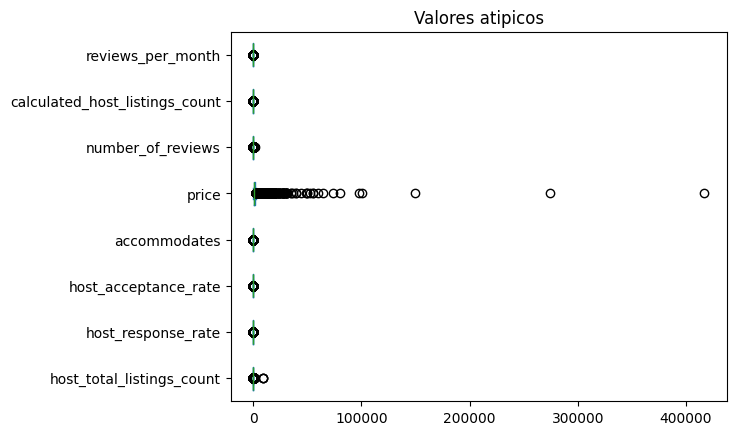

In [150]:
#Hacer un boxplot de valores atipicos de las columnas cuantitativas
fig = plt.figure(figsize = (20, 10))
columnas_cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos")
plt.show()

In [151]:
y = columnas_cuantitativas
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite inferior permitido", Limite_inferior)

Limite superior permitido host_total_listings_count           488.576569
host_response_rate                  145.228131
host_acceptance_rate                183.506070
accommodates                         10.367106
price                             13214.172810
number_of_reviews                   262.987146
calculated_host_listings_count      147.053524
reviews_per_month                     6.989101
dtype: float64
Limite inferior permitido host_total_listings_count          -415.153144
host_response_rate                   43.400984
host_acceptance_rate                -22.236964
accommodates                         -3.685316
price                            -10260.222856
number_of_reviews                  -176.087990
calculated_host_listings_count     -112.690847
reviews_per_month                    -3.589922
dtype: float64


In [152]:
#Filtrar solo por columnas dentro de los limites
columnas_cuantitativas_sin_outliers = columnas_cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]

In [153]:
#Revisar valores nulos
valores_nulos_cuantitativo = columnas_cuantitativas_sin_outliers.isnull().sum()
valores_nulos_cuantitativo

host_total_listings_count         415
host_response_rate                821
host_acceptance_rate                0
accommodates                      500
price                             130
number_of_reviews                 611
calculated_host_listings_count    718
reviews_per_month                 389
dtype: int64

In [154]:
#Hacer una copia del dataframe y rellenar los valores nulos con la media
columnas_cuantitativas_limpio = columnas_cuantitativas_sin_outliers.copy()
columnas_cuantitativas_limpio = columnas_cuantitativas_limpio.fillna(round(columnas_cuantitativas_sin_outliers.mean(), 1))

In [155]:
#Se juntan las columnas cualitativas con las cuantitativas
Mexico_outliers = pd.concat([columnas_cuantitativas_limpio, columnas_cualitativas], axis = 1)
Mexico_outliers.head()

,host_total_listings_count,host_response_rate,host_acceptance_rate,accommodates,price,number_of_reviews,calculated_host_listings_count,reviews_per_month,listing_url,last_scraped,source,name,host_url,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,bedrooms,beds,amenities,has_availability,review_scores_rating,instant_bookable
0,6.0,100.0,88.0,2.0,1652.0,56.0,3.0,0.41,https://www.airbnb.com/rooms/898633,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,https://www.airbnb.com/users/show/4796027,Marco,2013-01-21,"Mexico City, Mexico",within an hour,t,Roma Norte,"['email', 'phone']",t,t,Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,1.0,2.0,"[""40 inch HDTV with Amazon Prime Video, Netfli...",t,4.95,f
1,1.0,97.1,4.7,2.0,3663.0,0.0,1.0,1.70,https://www.airbnb.com/rooms/35797,2024-06-27,city scrape,Villa Dante,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico",a few days or more,f,SIN INFORMACIÓN,"['email', 'phone', 'work_email']",t,t,Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,1.0,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",t,INFORMACIÓN NO DISPONIBLE,f
2,17.0,100.0,92.0,3.1,1333.4,64.0,13.0,0.42,https://www.airbnb.com/rooms/44616,2024-06-28,city scrape,CONDESA HAUS B&B,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",within an hour,t,Condesa,"['email', 'phone', 'work_email']",t,t,Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,5.0,8.0,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",t,4.58,f
3,4.0,100.0,96.0,4.0,814.0,161.0,1.0,1.19,https://www.airbnb.com/rooms/913084,2024-06-28,city scrape,15 blocks from Paseo de la Reforma,https://www.airbnb.com/users/show/4647293,Martina,2013-01-09,"Mexico City, Mexico",within an hour,t,SIN INFORMACIÓN,"['email', 'phone']",t,t,Miguel Hidalgo,Entire serviced apartment,Entire home/apt,1 bath,2.0,3.0,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",t,4.75,t
4,4.0,89.0,62.0,4.0,1923.0,49.0,2.0,0.32,https://www.airbnb.com/rooms/67703,2024-06-28,city scrape,"2 bedroom apt. deco bldg, Condesa",https://www.airbnb.com/users/show/334451,Nicholas,2011-01-04,"Mexico City, Mexico",within a day,t,Hipódromo,"['email', 'phone']",t,t,Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,2.0,2.0,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",t,4.9,f


In [156]:
#Comprobamos que no existan valores nulos
valores_nulos_Mexico_outliers = Mexico_outliers.isnull().sum()
valores_nulos_Mexico_outliers

host_total_listings_count         0
host_response_rate                0
host_acceptance_rate              0
accommodates                      0
price                             0
number_of_reviews                 0
calculated_host_listings_count    0
reviews_per_month                 0
listing_url                       0
last_scraped                      0
source                            0
name                              0
host_url                          0
host_name                         0
host_since                        0
host_location                     0
host_response_time                0
host_is_superhost                 0
host_neighbourhood                0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
property_type                     0
room_type                         0
bathrooms_text                    0
bedrooms                          0
beds                        

In [157]:
Mexico_outliers.to_csv('Mexico sin outliers.csv', index=False)

REGRESIONES NO LINEALES

c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: Futur

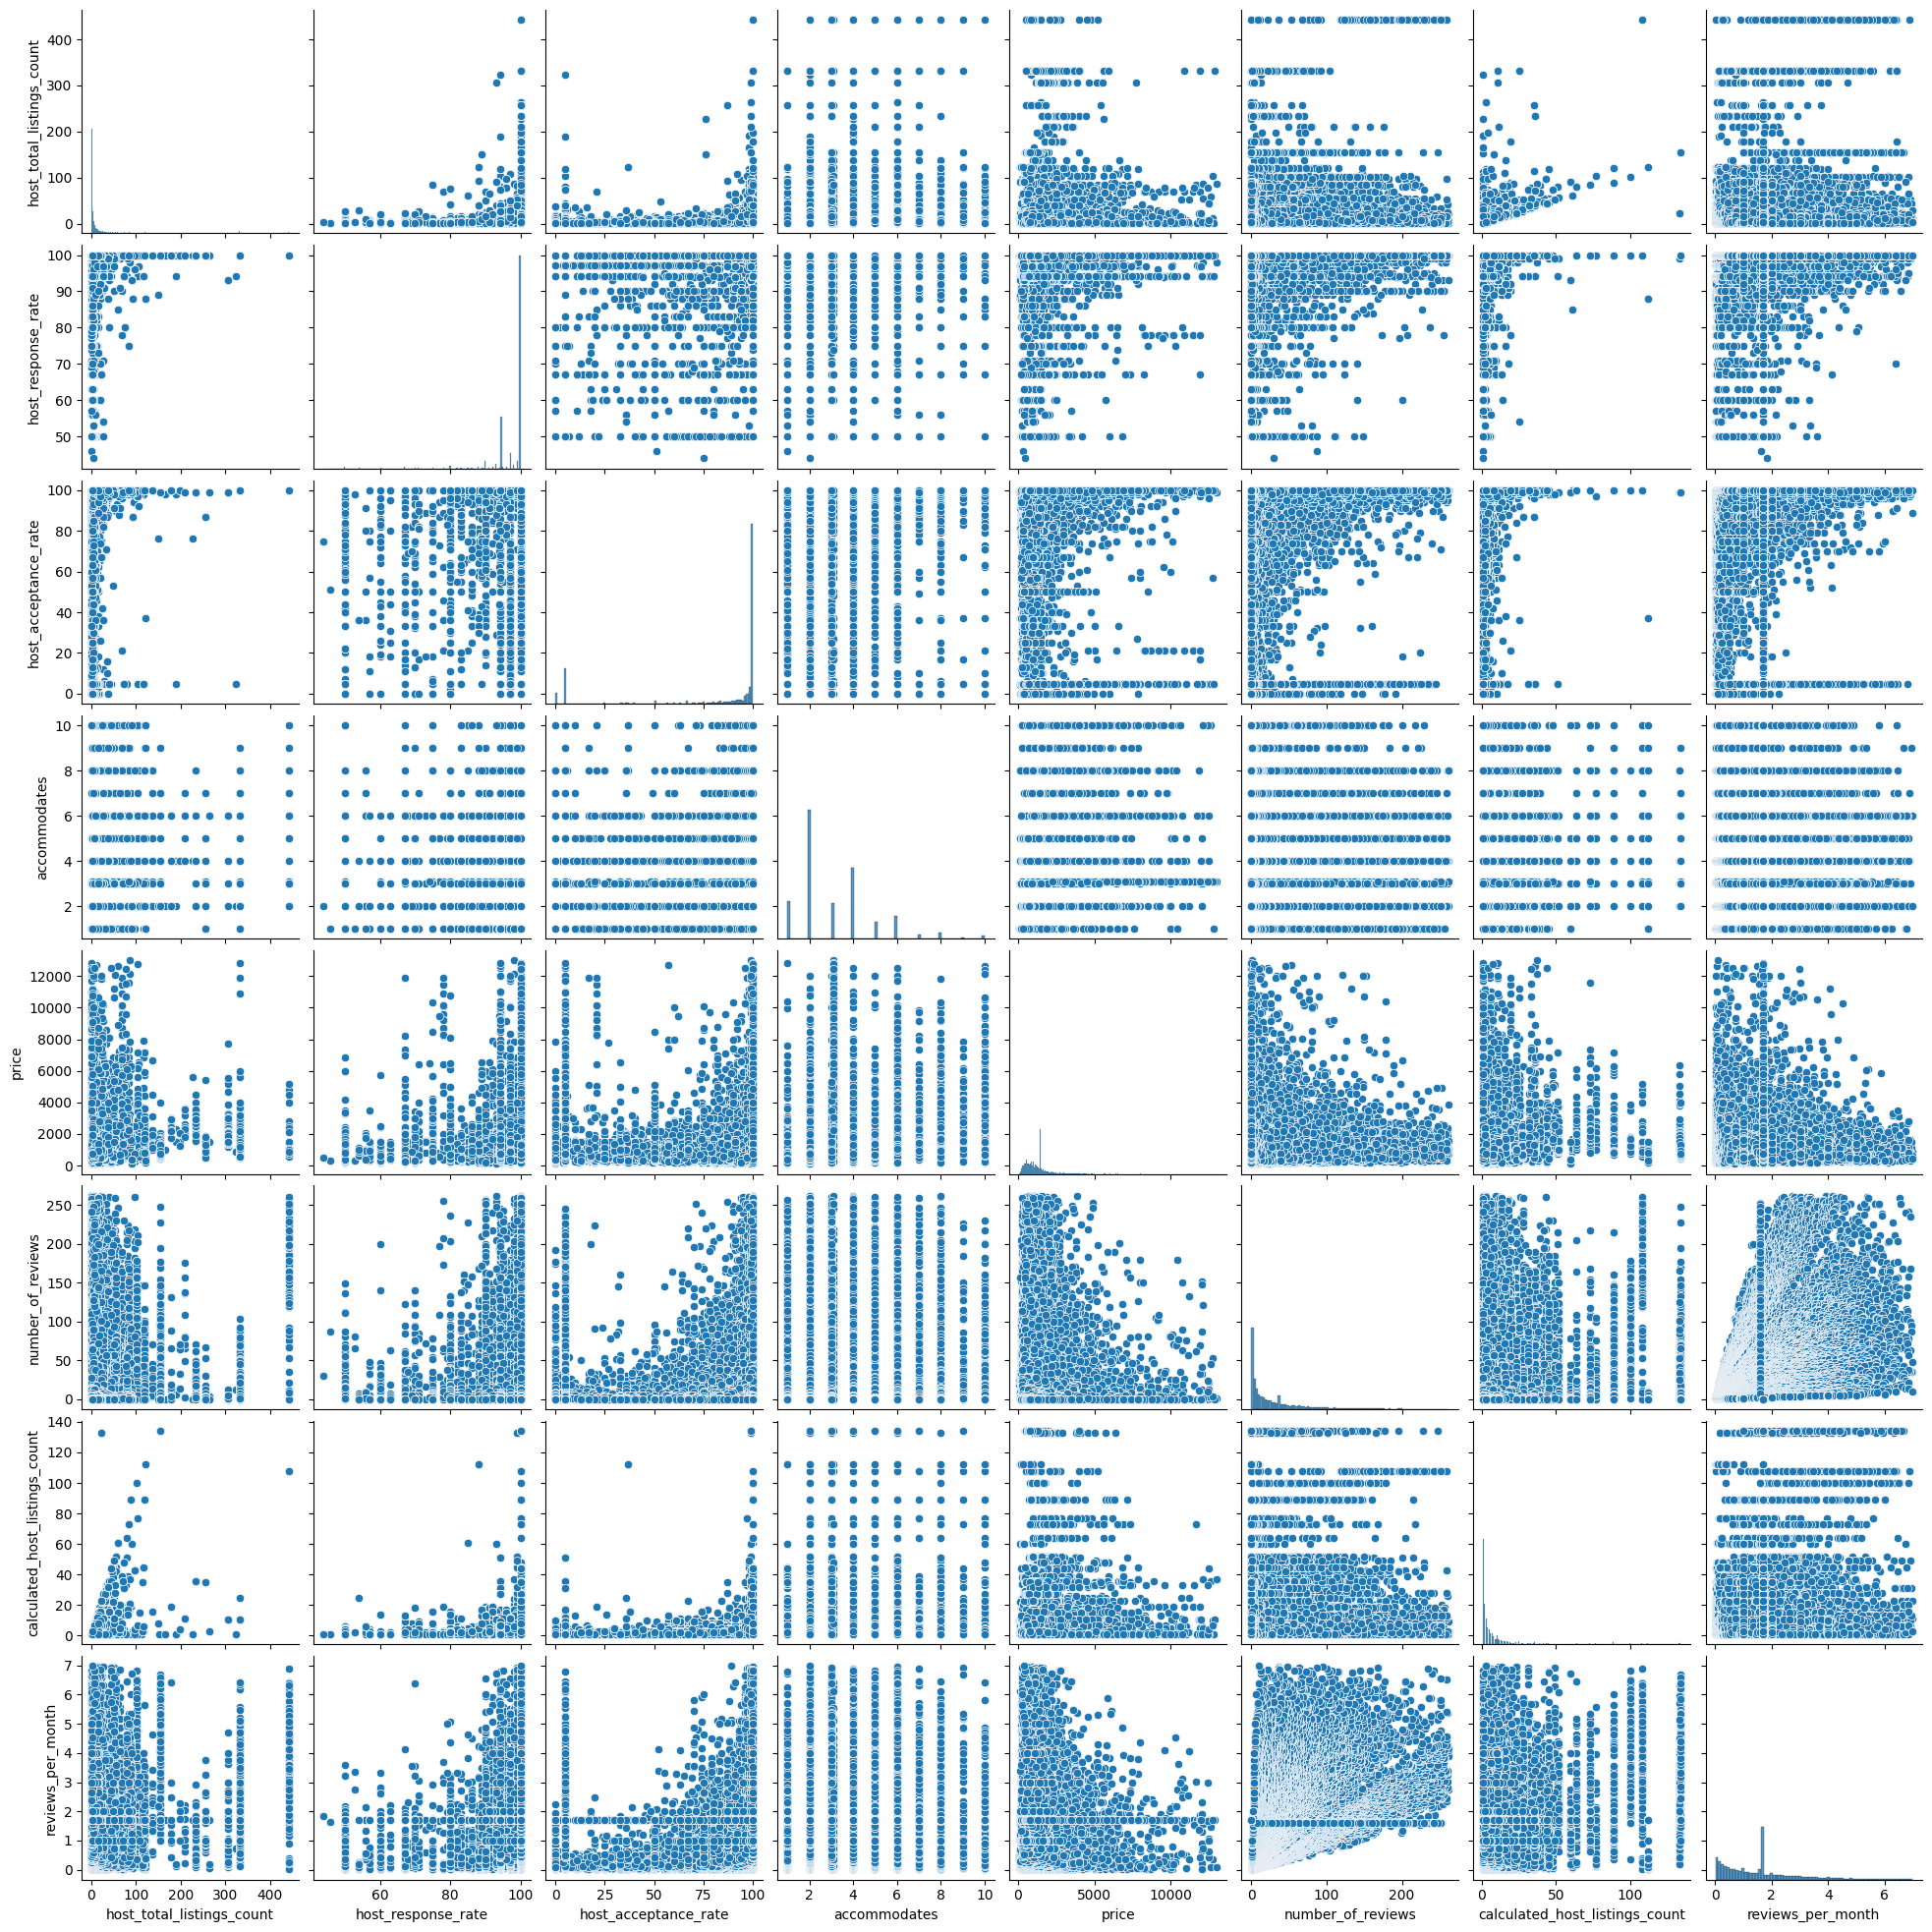

In [158]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(Mexico_outliers)

In [159]:
# Lista de pares de variables
variables = [
    ('host_response_rate', 'host_acceptance_rate'),
    ('host_response_rate', 'host_total_listings_count'),
    ('host_response_rate', 'accommodates'),
    ('host_response_rate', 'reviews_per_month'),
    ('host_response_rate', 'price'),
    ('host_acceptance_rate', 'host_total_listings_count'),
    ('host_acceptance_rate', 'accommodates'),
    ('host_acceptance_rate', 'reviews_per_month'),
    ('host_acceptance_rate', 'price'),
    ('host_acceptance_rate', 'host_response_rate'),
    ('host_total_listings_count', 'accommodates'),
    ('host_total_listings_count', 'reviews_per_month'),
    ('host_total_listings_count', 'price'),
    ('host_total_listings_count', 'host_response_rate'),
    ('host_total_listings_count', 'host_acceptance_rate'),
    ('accommodates', 'reviews_per_month'),
    ('accommodates', 'price'),
    ('accommodates', 'host_response_rate'),
    ('accommodates', 'host_acceptance_rate'),
    ('accommodates', 'host_total_listings_count'),
    ('reviews_per_month', 'price'),
    ('reviews_per_month', 'host_response_rate'),
    ('reviews_per_month', 'host_acceptance_rate'),
    ('reviews_per_month', 'host_total_listings_count'),
    ('reviews_per_month', 'accommodates'),
]

REGRESION NO LINEAL FUNCION CUADRATICA

In [160]:
# Definir la función no lineal
def func1(x, a, b, c):
    return a * np.abs(x) + b * x + c

# Lista para almacenar los resultados
resultados = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = Mexico_outliers[var1]
    y = Mexico_outliers[var2]

    # Ajustar el modelo no lineal
    parametros, covs = curve_fit(func1, x, y)
    a, b, c = parametros
    yfit = func1(x, a, b, c)

    # Calcular el coeficiente de determinación
    R2 = r2_score(y, yfit)

    # Almacenar los resultados en la lista
    resultados.append((var1, var2, a, b, c, R2))

# Crear un DataFrame a partir de los resultados
df_resultados = pd.DataFrame(resultados, columns=['Variable 1', 'Variable 2', 'a', 'b', 'c', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados = df_resultados.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados

,Variable 1,Variable 2,a,b,c,R²
16,accommodates,price,-82.632272,325.070782,574.887241,0.131243
9,host_acceptance_rate,host_response_rate,100.030307,-99.976205,92.700443,0.074444
0,host_response_rate,host_acceptance_rate,100.690641,-99.314640,-52.924103,0.074444
22,reviews_per_month,host_acceptance_rate,108.572883,-103.026303,71.900879,0.044736
7,host_acceptance_rate,reviews_per_month,-99.999223,100.007289,0.924240,0.044736
3,host_response_rate,reviews_per_month,-99.987266,100.018015,-1.410011,0.025565
21,reviews_per_month,host_response_rate,106.215299,-105.383887,95.753757,0.025565
5,host_acceptance_rate,host_total_listings_count,-99.883118,100.123394,3.524395,0.021609
14,host_total_listings_count,host_acceptance_rate,100.051786,-99.961853,78.575192,0.021609
18,accommodates,host_acceptance_rate,309.003339,-306.410658,72.522654,0.017675


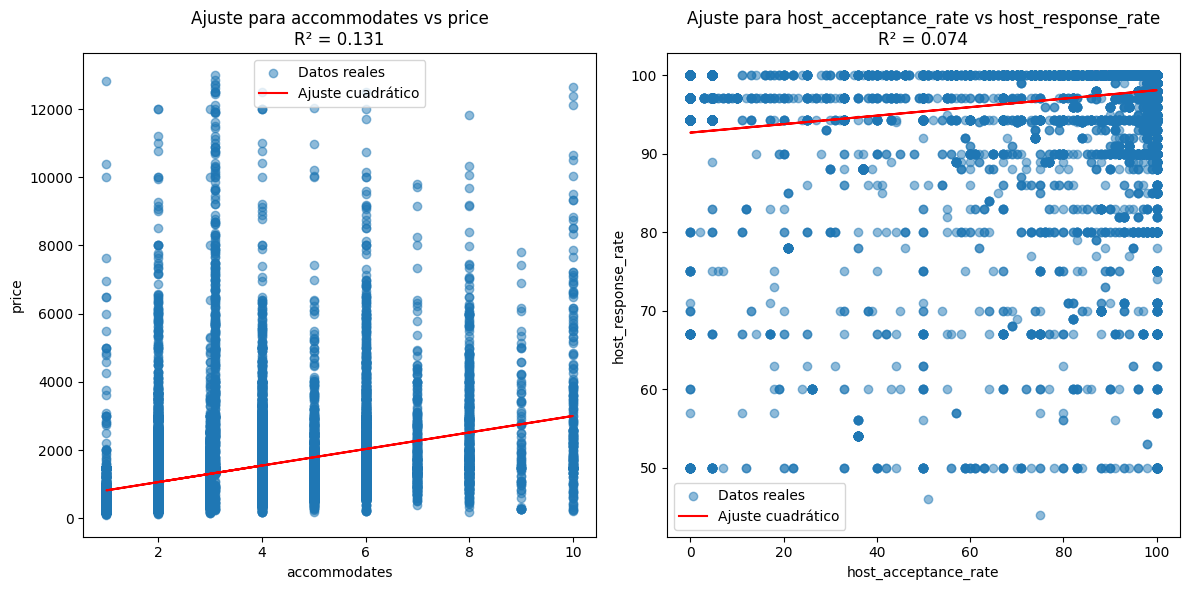

In [161]:
# Graficar los mejores dos modelos
plt.figure(figsize=(12, 6))

# Obtener los dos mejores modelos
mejores_modelos = df_resultados.head(2)

# Usar enumerate para obtener el índice correcto para las subgráficas
for i, (index, row) in enumerate(mejores_modelos.iterrows()):
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    a = row['a']
    b = row['b']
    c = row['c']

    x = Mexico_outliers[var1]
    y = Mexico_outliers[var2]
    # Use func1 instead of func_cuadratica
    yfit = func1(x, a, b, c)

    plt.subplot(1, 2, i + 1)  # Usar i en lugar de index
    plt.scatter(x, y, label='Datos reales', alpha=0.5)
    plt.plot(x, yfit, color='red', label='Ajuste cuadrático')
    plt.title(f'Ajuste para {var1} vs {var2}\nR² = {row["R²"]:.3f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()

plt.tight_layout()
plt.show()

REGRESION NO LINEAL FUNCION EXPONENCIAL

In [162]:
# Definir la función exponencial
def func_exponencial(x, a, b, c):
    return a * np.exp(b * x) + c

# Lista para almacenar los resultados
resultados2 = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = Mexico_outliers[var1]
    y = Mexico_outliers[var2]

    # Ajustar el modelo no lineal
    parametros2, _ = curve_fit(func_exponencial, x, y, maxfev = 2000)
    a, b, c = parametros2 # Use parametros2 instead of parametros
    yfit2 = func_exponencial(x, a, b, c)

    # Calcular el coeficiente de determinación
    R2_2 = r2_score(y, yfit2)

    # Almacenar los resultados en la lista
    resultados2.append((var1, var2, a, b, c, R2_2))

# Crear un DataFrame a partir de los resultados
df_resultados2 = pd.DataFrame(resultados2, columns=['Variable 1', 'Variable 2', 'a', 'b', 'c', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados2 = df_resultados2.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados2

C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_33224\4048593940.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros2, _ = curve_fit(func_exponencial, x, y, maxfev = 2000)
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_33224\4048593940.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros2, _ = curve_fit(func_exponencial, x, y, maxfev = 2000)
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_33224\4048593940.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros2, _ = curve_fit(func_exponencial, x, y, maxfev = 2000)
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_33224\4048593940.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros2, _ = curve_fit(func_exponencial, x, y, maxfev = 2000)
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_33224\4048593940.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros2, _ = curve_fit(func

,Variable 1,Variable 2,a,b,c,R²
16,accommodates,price,1.528820e+06,0.000158,-1.528244e+06,1.312412e-01
22,reviews_per_month,host_acceptance_rate,2.697613e+04,0.000206,-2.690423e+04,4.473343e-02
21,reviews_per_month,host_response_rate,7.683569e+03,0.000108,-7.587815e+03,2.556422e-02
18,accommodates,host_acceptance_rate,4.154818e+04,0.000062,-4.147566e+04,1.767372e-02
15,accommodates,reviews_per_month,2.160756e+03,0.000044,-2.159479e+03,1.634524e-02
24,reviews_per_month,accommodates,2.682796e+03,0.000064,-2.679938e+03,1.634524e-02
23,reviews_per_month,host_total_listings_count,1.045593e+04,0.000461,-1.044062e+04,1.264994e-02
17,accommodates,host_response_rate,2.862141e+03,0.000114,-2.766096e+03,7.092563e-03
19,accommodates,host_total_listings_count,1.601002e+04,0.000112,-1.599272e+04,3.150975e-03
20,reviews_per_month,price,-8.071411e+00,0.630480,1.368568e+03,2.380780e-03


REGRESION NO LINEAL FUNCION INVERSA

In [163]:
# Definir la función inversa
def func_inversa(x, a):
    return 1 / a * x

# Lista para almacenar los resultados
resultados3 = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = Mexico_outliers[var1]
    y = Mexico_outliers[var2]

    # Ajustar el modelo no lineal
    parametros3, _ = curve_fit(func_inversa, x, y)
    a = parametros3[0]
    yfit3 = func_inversa(x, a)

    # Calcular el coeficiente de determinación
    R2_3 = r2_score(y, yfit3)

    # Almacenar los resultados en la lista
    resultados3.append((var1, var2, a, R2_3))

# Crear un DataFrame a partir de los resultados
df_resultados3 = pd.DataFrame(resultados3, columns=['Variable 1', 'Variable 2', 'a', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados3 = df_resultados3.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados3

,Variable 1,Variable 2,a,R²
16,accommodates,price,0.002617,0.073951
0,host_response_rate,host_acceptance_rate,1.199893,0.062812
5,host_acceptance_rate,host_total_listings_count,3.606330,0.021003
3,host_response_rate,reviews_per_month,61.374313,0.019887
2,host_response_rate,accommodates,31.071925,0.005467
1,host_response_rate,host_total_listings_count,4.232944,0.001280
4,host_response_rate,price,0.073159,-0.006610
23,reviews_per_month,host_total_listings_count,0.094564,-0.017793
19,accommodates,host_total_listings_count,0.166899,-0.019716
7,host_acceptance_rate,reviews_per_month,56.267239,-0.031775


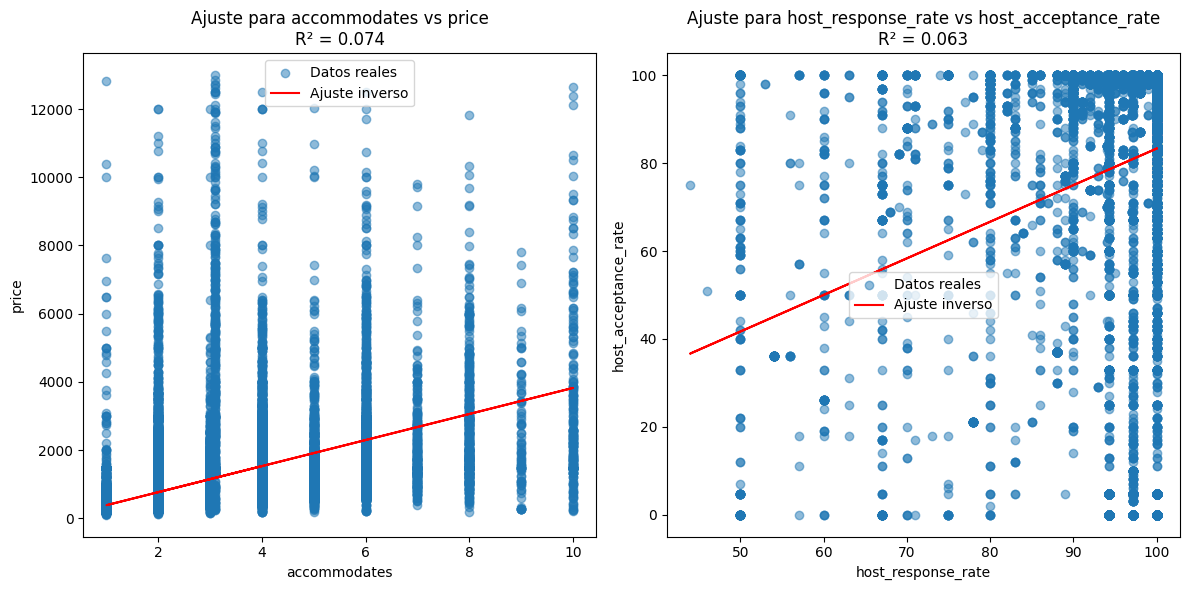

In [164]:
# Graficar los mejores dos modelos
plt.figure(figsize=(12, 6))

# Obtener los dos mejores modelos
mejores_modelos3 = df_resultados3.head(2)

# Usar enumerate para obtener el índice correcto para las subgráficas
for i, (index, row) in enumerate(mejores_modelos3.iterrows()):
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    a = row['a']

    x = Mexico_outliers[var1].values
    y = Mexico_outliers[var2].values
    yfit3 = func_inversa(x, a)

    plt.subplot(1, 2, i + 1)  # Usar i para la subgráfica
    plt.scatter(x, y, label='Datos reales', alpha=0.5)
    plt.plot(x, yfit3, color='red', label='Ajuste inverso')
    plt.title(f'Ajuste para {var1} vs {var2}\nR² = {row["R²"]:.3f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()

plt.tight_layout()
plt.show()

REGRESION NO LINEAL FUNCION SENOIDAL

In [165]:
# Definir la función senoidal
def func_senoidal(x, a, b):
    return a * np.sin(x) + b

# Lista para almacenar los resultados
resultados4 = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = Mexico_outliers[var1]
    y = Mexico_outliers[var2]

    # Ajustar el modelo no lineal
    parametros4, _ = curve_fit(func_senoidal, x, y)
    a, b = parametros4
    yfit4 = func_senoidal(x, a, b)

    # Calcular el coeficiente de determinación
    R2_4 = r2_score(y, yfit4)

    # Almacenar los resultados en la lista
    resultados4.append((var1, var2, a, b, R2_4))

# Crear un DataFrame a partir de los resultados
df_resultados4 = pd.DataFrame(resultados4, columns=['Variable 1', 'Variable 2', 'a', 'b', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados4 = df_resultados4.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados4

,Variable 1,Variable 2,a,b,R²
0,host_response_rate,host_acceptance_rate,-35.019296,69.026809,0.160249
16,accommodates,price,-338.825786,1421.458294,0.045283
14,host_total_listings_count,host_acceptance_rate,-8.336084,82.357605,0.030561
1,host_response_rate,host_total_listings_count,-24.532470,14.767204,0.029435
3,host_response_rate,reviews_per_month,-0.527502,1.399756,0.025004
5,host_acceptance_rate,host_total_listings_count,-12.240486,17.222407,0.013203
22,reviews_per_month,host_acceptance_rate,-6.448658,83.862864,0.009527
7,host_acceptance_rate,reviews_per_month,-0.242061,1.462350,0.009486
15,accommodates,reviews_per_month,-0.153433,1.614472,0.007520
18,accommodates,host_acceptance_rate,-4.020467,81.679190,0.007508


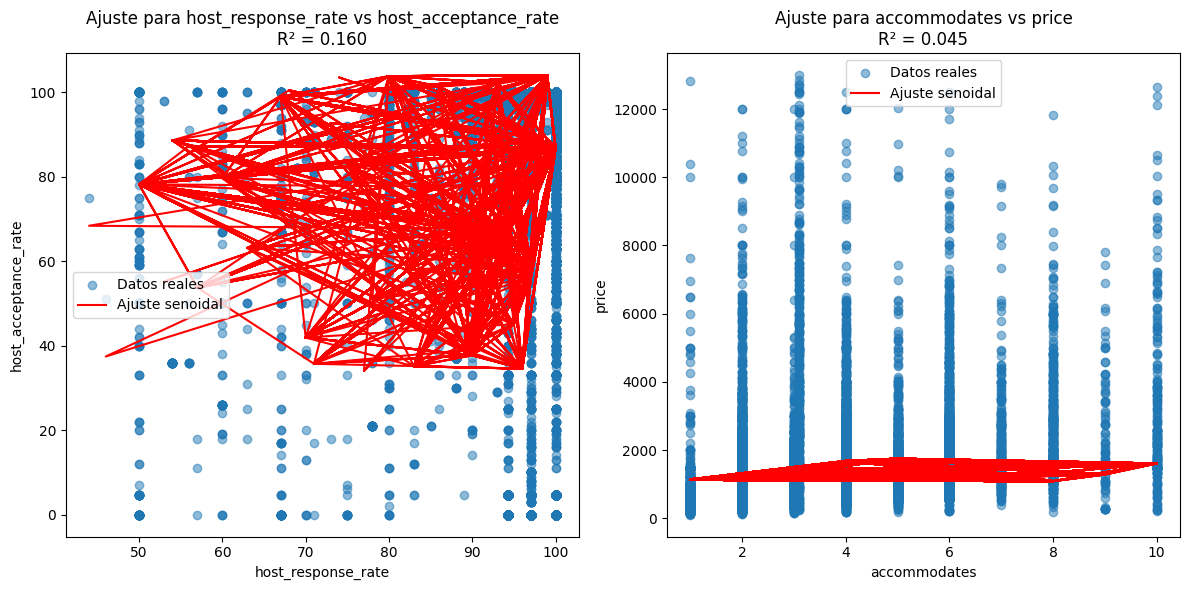

In [166]:
# Graficar los mejores dos modelos
plt.figure(figsize=(12, 6))

# Obtener los dos mejores modelos
mejores_modelos4 = df_resultados4.head(2)

# Usar enumerate para obtener el índice correcto para las subgráficas
for i, (index, row) in enumerate(mejores_modelos4.iterrows()):
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    a = row['a']
    b = row['b']

    x = Mexico_outliers[var1].values
    y = Mexico_outliers[var2].values
    yfit4 = func_senoidal(x, a, b)

    plt.subplot(1, 2, i + 1)  # Usar i para la subgráfica
    plt.scatter(x, y, label='Datos reales', alpha=0.5)
    plt.plot(x, yfit4, color='red', label='Ajuste senoidal')
    plt.title(f'Ajuste para {var1} vs {var2}\nR² = {row["R²"]:.3f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()

plt.tight_layout()
plt.show()

REGRESION NO LINEAL FUNCION TANGENCIAL

In [167]:
# Definir la función tangencial
def func_tangencial(x, a, b):
    return a * np.tan(x) + b

# Lista para almacenar los resultados
resultados5 = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = Mexico_outliers[var1]
    y = Mexico_outliers[var2]

    # Ajustar el modelo no lineal
    parametros5, _ = curve_fit(func_tangencial, x, y)
    a, b = parametros5
    yfit5 = func_tangencial(x, a, b)

    # Calcular el coeficiente de determinación
    R2_5 = r2_score(y, yfit5)

    # Almacenar los resultados en la lista
    resultados5.append((var1, var2, a, b, R2_5))


# Crear un DataFrame a partir de los resultados
df_resultados5 = pd.DataFrame(resultados5, columns=['Variable 1', 'Variable 2', 'a', 'b', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados5 = df_resultados5.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados5

,Variable 1,Variable 2,a,b,R²
5,host_acceptance_rate,host_total_listings_count,-0.285944,24.213598,0.021017
9,host_acceptance_rate,host_response_rate,-0.031505,97.207755,0.017337
0,host_response_rate,host_acceptance_rate,-1.178314,79.521301,0.016955
7,host_acceptance_rate,reviews_per_month,-0.004767,1.596524,0.010733
3,host_response_rate,reviews_per_month,-0.032438,1.543959,0.008837
1,host_response_rate,host_total_listings_count,-1.159099,21.803813,0.006141
6,host_acceptance_rate,accommodates,-0.004477,3.149352,0.005235
8,host_acceptance_rate,price,2.588296,1321.520966,0.003907
18,accommodates,host_acceptance_rate,-1.159881,79.755213,0.003861
15,accommodates,reviews_per_month,-0.038235,1.545618,0.002886


REGRESION NO LINEAL VALOR ABSOLUTO

In [168]:
# Definir la función valor absoluto
def func_valor_absoluto(x, a, b, c):
    return a * np.abs(x) + b * x + c

# Lista para almacenar los resultados
resultados6 = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = Mexico_outliers[var1]
    y = Mexico_outliers[var2]

    # Ajustar el modelo no lineal
    parametros6, _ = curve_fit(func_valor_absoluto, x, y)
    a, b, c = parametros6
    yfit6 = func_valor_absoluto(x, a, b, c)

    # Calcular el coeficiente de determinación
    R2_6 = r2_score(y, yfit6)

    # Almacenar los resultados en la lista
    resultados6.append((var1, var2, a, b, c, R2_6))

# Crear un DataFrame a partir de los resultados
df_resultados6 = pd.DataFrame(resultados6, columns=['Variable 1', 'Variable 2', 'a', 'b', 'c', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados6 = df_resultados6.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados6

,Variable 1,Variable 2,a,b,c,R²
16,accommodates,price,-82.632272,325.070782,574.887241,0.131243
9,host_acceptance_rate,host_response_rate,100.030307,-99.976205,92.700443,0.074444
0,host_response_rate,host_acceptance_rate,100.690641,-99.314640,-52.924103,0.074444
22,reviews_per_month,host_acceptance_rate,108.572883,-103.026303,71.900879,0.044736
7,host_acceptance_rate,reviews_per_month,-99.999223,100.007289,0.924240,0.044736
3,host_response_rate,reviews_per_month,-99.987266,100.018015,-1.410011,0.025565
21,reviews_per_month,host_response_rate,106.215299,-105.383887,95.753757,0.025565
5,host_acceptance_rate,host_total_listings_count,-99.883118,100.123394,3.524395,0.021609
14,host_total_listings_count,host_acceptance_rate,100.051786,-99.961853,78.575192,0.021609
18,accommodates,host_acceptance_rate,309.003339,-306.410658,72.522654,0.017675


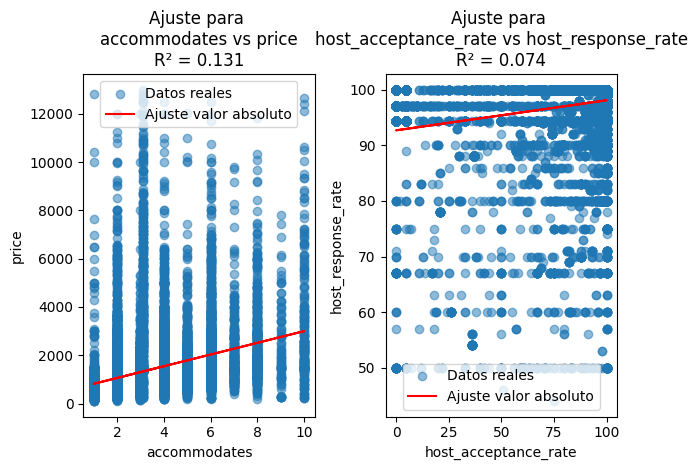

In [169]:
# Obtener los dos mejores modelos
mejores_modelos6 = df_resultados6.head(2)

# Usar enumerate para obtener el índice correcto para las subgráficas
for i, (index, row) in enumerate(mejores_modelos6.iterrows()):
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    a = row['a']
    b = row['b']
    c = row['c']

    x = Mexico_outliers[var1].values
    y = Mexico_outliers[var2].values
    yfit6 = func_valor_absoluto(x, a, b, c)

    plt.subplot(1, 2, i + 1)  # Usar i para la subgráfica
    plt.scatter(x, y, label='Datos reales', alpha=0.5)
    plt.plot(x, yfit6, color='red', label='Ajuste valor absoluto')
    plt.title(f'Ajuste para \n{var1} vs {var2}\nR² = {row["R²"]:.3f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()

plt.tight_layout()
plt.show()

REGRESION NO LINEAL COEFICIENTE ENTRE POLINOMIOS

In [170]:
# Definir la función cociente entre polinomios
def func_cociente_polinomios(x, a, b, c):
    return (a * x**2 + b) / (c * x + 1e-7)

# Lista para almacenar los resultados
resultados7 = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = Mexico_outliers[var1]
    y = Mexico_outliers[var2]

    # Ajustar el modelo no lineal
    parametros7, _ = curve_fit(func_cociente_polinomios, x, y)
    a, b, c = parametros7
    yfit7 = func_cociente_polinomios(x, a, b, c)

    # Calcular el coeficiente de determinación
    R2_7 = r2_score(y, yfit7)

    # Almacenar los resultados en la lista
    resultados7.append((var1, var2, a, b, c, R2_7))

# Crear un DataFrame a partir de los resultados
df_resultados7 = pd.DataFrame(resultados7, columns=['Variable 1', 'Variable 2', 'a', 'b', 'c', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados7 = df_resultados7.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados7

,Variable 1,Variable 2,a,b,c,R²
16,accommodates,price,1.262232e-05,1.167736e-04,3.005338e-08,0.119448
0,host_response_rate,host_acceptance_rate,7.115500e+01,-9.676282e+04,7.311495e+01,0.067843
22,reviews_per_month,host_acceptance_rate,-8.863500e-08,7.049326e-06,-1.014962e-08,0.046301
21,reviews_per_month,host_response_rate,-1.050689e-08,9.543185e-06,-1.342694e-09,0.026814
3,host_response_rate,reviews_per_month,7.421653e+00,-1.546638e+04,3.552308e+02,0.023632
5,host_acceptance_rate,host_total_listings_count,-1.674069e+01,2.639326e-07,-6.037488e+01,0.021077
24,reviews_per_month,accommodates,-4.149497e-09,2.760652e-07,-1.040313e-08,0.020468
23,reviews_per_month,host_total_listings_count,6.598096e-09,1.885090e-06,-9.182755e-09,0.010601
17,accommodates,host_response_rate,-5.071516e-09,9.538073e-06,-7.664886e-10,0.008254
2,host_response_rate,accommodates,5.270520e+00,8.782122e+03,1.925900e+02,0.007737


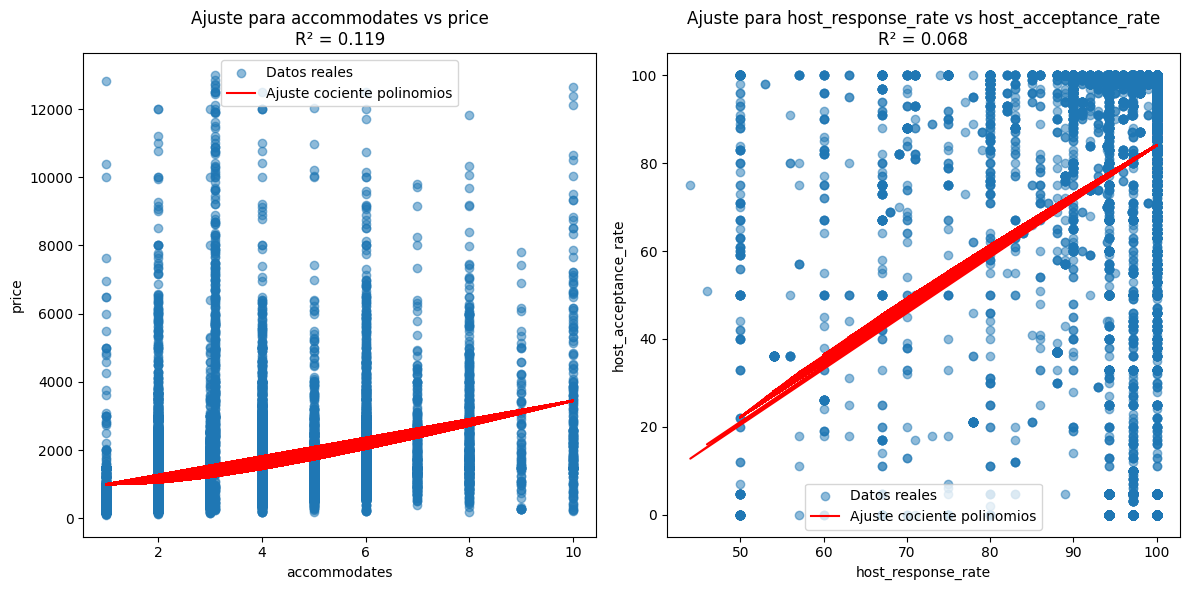

In [171]:
# Graficar los mejores dos modelos
plt.figure(figsize=(12, 6))

# Obtener los dos mejores modelos
mejores_modelos7 = df_resultados7.head(2)

# Usar enumerate para obtener el índice correcto para las subgráficas
for i, (index, row) in enumerate(mejores_modelos7.iterrows()):
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    a = row['a']
    b = row['b']
    c = row['c']

    x = Mexico_outliers[var1].values
    y = Mexico_outliers[var2].values
    yfit7 = func_cociente_polinomios(x, a, b, c)

    plt.subplot(1, 2, i + 1)  # Usar i para la subgráfica
    plt.scatter(x, y, label='Datos reales', alpha=0.5)
    plt.plot(x, yfit7, color='red', label='Ajuste cociente polinomios')
    plt.title(f'Ajuste para {var1} vs {var2}\nR² = {row["R²"]:.3f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()

plt.tight_layout()
plt.show()

REGRESION NO LINEAL LOGARITMICA

In [172]:
# Definir la función logarítmica
def func_logaritmica(x, a, b):
    return a * np.log(x + 1e-7) + b  # Evitar log(0)

# Lista para almacenar los resultados
resultados8 = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = Mexico_outliers[var1]
    y = Mexico_outliers[var2]

    # Ajustar el modelo no lineal
    parametros8, _ = curve_fit(func_logaritmica, x, y)
    a, b = parametros8
    yfit8 = func_logaritmica(x, a, b)

    # Calcular el coeficiente de determinación
    R2_8 = r2_score(y, yfit8)

    # Almacenar los resultados en la lista
    resultados8.append((var1, var2, a, b, R2_8))

# Crear un DataFrame a partir de los resultados
df_resultados8 = pd.DataFrame(resultados8, columns=['Variable 1', 'Variable 2', 'a', 'b', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados8 = df_resultados8.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados8

,Variable 1,Variable 2,a,b,R²
16,accommodates,price,760.531489,578.225524,0.125117
14,host_total_listings_count,host_acceptance_rate,7.062706,67.663646,0.093279
22,reviews_per_month,host_acceptance_rate,7.508675,80.837583,0.067073
0,host_response_rate,host_acceptance_rate,96.526145,-360.700111,0.057859
21,reviews_per_month,host_response_rate,0.952431,97.088656,0.027447
18,accommodates,host_acceptance_rate,10.112990,70.592514,0.026052
15,accommodates,reviews_per_month,0.361008,1.216130,0.022830
3,host_response_rate,reviews_per_month,2.259185,-8.754787,0.021796
11,host_total_listings_count,reviews_per_month,0.123591,1.347627,0.019643
24,reviews_per_month,accommodates,0.206600,3.134355,0.019311


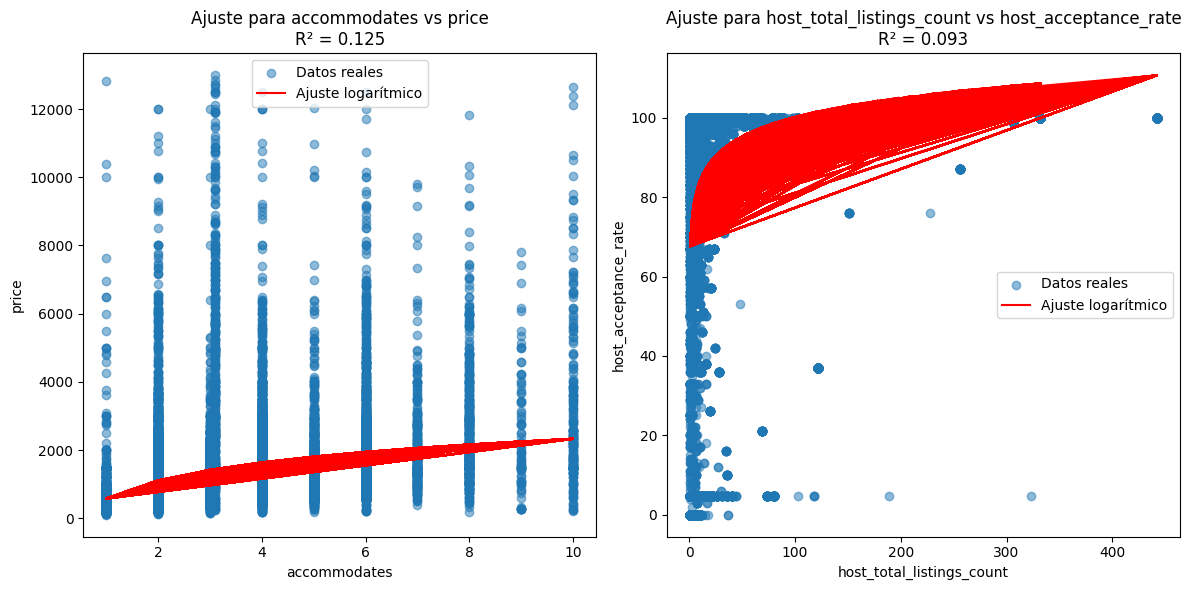

In [173]:
# Graficar los dos mejores modelos logarítmicos
plt.figure(figsize=(12, 6))

# Obtener los dos mejores modelos
mejores_modelos8 = df_resultados8.head(2)

# Usar enumerate para obtener el índice correcto para las subgráficas
for i, (index, row) in enumerate(mejores_modelos8.iterrows()):
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    a = row['a']
    b = row['b']

    x = Mexico_outliers[var1]
    y = Mexico_outliers[var2]
    yfit8 = func_logaritmica(x, a, b)

    plt.subplot(1, 2, i + 1)  # Usar i para la subgráfica
    plt.scatter(x, y, label='Datos reales', alpha=0.5)
    plt.plot(x, yfit8, color='red', label='Ajuste logarítmico')
    plt.title(f'Ajuste para {var1} vs {var2}\nR² = {row["R²"]:.3f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()

plt.tight_layout()
plt.show()

REGRESION NO LINEAL CON PRODUCTO DE COEFICIENTES

In [174]:
# Definir la función lineal con producto de coeficientes
def func_lineal_producto(x, a, b, c):
    return a * x + b * x + c * x

# Lista para almacenar los resultados
resultados9 = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = Mexico_outliers[var1]
    y = Mexico_outliers[var2]

    # Ajustar el modelo no lineal
    parametros9, _ = curve_fit(func_lineal_producto, x, y)
    a, b, c = parametros9
    yfit9 = func_lineal_producto(x, a, b, c)

    # Calcular el coeficiente de determinación
    R2_9 = r2_score(y, yfit9)

    # Almacenar los resultados en la lista
    resultados9.append((var1, var2, a, b, c, R2_9))

# Crear un DataFrame a partir de los resultados
df_resultados9 = pd.DataFrame(resultados9, columns=['Variable 1', 'Variable 2', 'a', 'b', 'c', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados9 = df_resultados9.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados9

,Variable 1,Variable 2,a,b,c,R²
16,accommodates,price,341.297700,-139.835093,180.615741,0.073951
0,host_response_rate,host_acceptance_rate,141.699161,-70.432876,-70.432876,0.062812
5,host_acceptance_rate,host_total_listings_count,-70.615505,-70.615505,141.508301,0.021003
3,host_response_rate,reviews_per_month,-141.980326,71.043455,70.953164,0.019887
2,host_response_rate,accommodates,-141.412269,70.722226,70.722226,0.005467
1,host_response_rate,host_total_listings_count,-141.342609,70.789426,70.789426,0.001280
4,host_response_rate,price,145.977625,-66.154410,-66.154410,-0.006610
23,reviews_per_month,host_total_listings_count,-67.184616,-67.184616,144.944086,-0.017793
19,accommodates,host_total_listings_count,-139.424138,72.707896,72.707896,-0.019716
7,host_acceptance_rate,reviews_per_month,-70.704462,-70.704462,141.426696,-0.031775


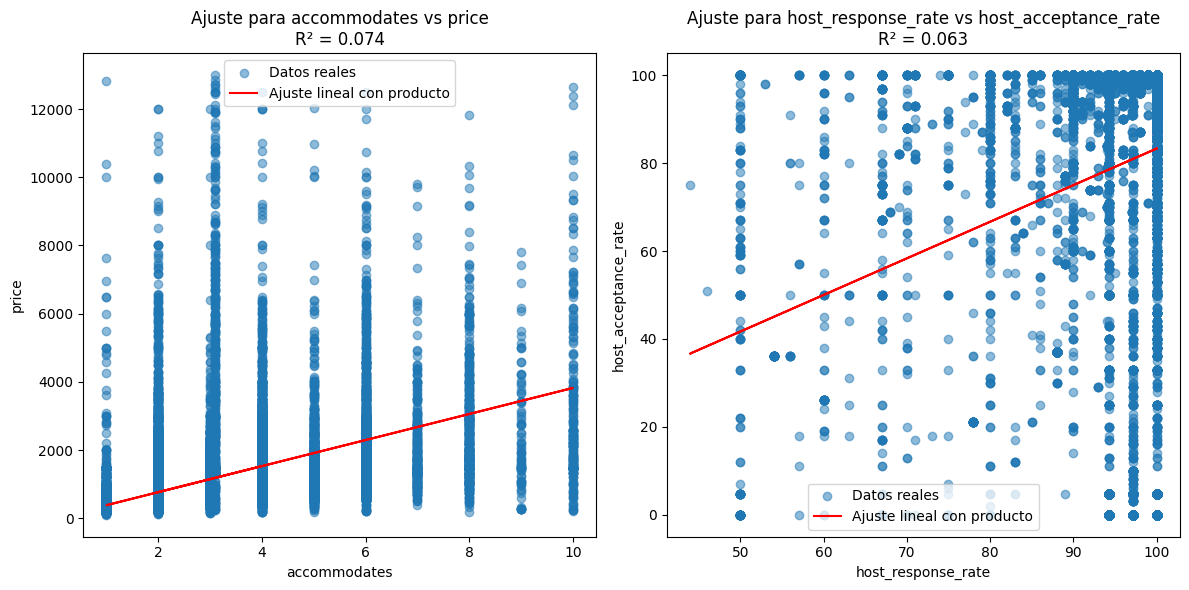

In [175]:
# Graficar los dos mejores modelos lineales con producto de coeficientes
plt.figure(figsize=(12, 6))

# Obtener los dos mejores modelos
mejores_modelos9 = df_resultados9.head(2)

# Usar enumerate para obtener el índice correcto para las subgráficas
for i, (index, row) in enumerate(mejores_modelos9.iterrows()):
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    a = row['a']
    b = row['b']
    c = row['c']

    x = Mexico_outliers[var1]
    y = Mexico_outliers[var2]
    yfit9 = func_lineal_producto(x, a, b, c)

    plt.subplot(1, 2, i + 1)  # Usar i para la subgráfica
    plt.scatter(x, y, label='Datos reales', alpha=0.5)
    plt.plot(x, yfit9, color='red', label='Ajuste lineal con producto')
    plt.title(f'Ajuste para {var1} vs {var2}\nR² = {row["R²"]:.3f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()

plt.tight_layout()
plt.show()

REGRESION NO LINEAL CUADRATICA INVERSA

In [176]:
# Definir la función cuadrática inversa
def func_cuadratica_inversa(x, a):
    return 1 / (a * x**2 + 1e-7)  # Evitar división por cero

# Lista para almacenar los resultados
resultados10 = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = Mexico_outliers[var1]
    y = Mexico_outliers[var2]

    # Ajustar el modelo no lineal
    parametros10, _ = curve_fit(func_cuadratica_inversa, x, y)
    a = parametros10[0]
    yfit10 = func_cuadratica_inversa(x, a)

    # Calcular el coeficiente de determinación
    R2_10 = r2_score(y, yfit)

    # Almacenar los resultados en la lista
    resultados10.append((var1, var2, a, R2_10))

# Crear un DataFrame a partir de los resultados
df_resultados10 = pd.DataFrame(resultados10, columns=['Variable 1', 'Variable 2', 'a', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados10 = df_resultados10.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados10

,Variable 1,Variable 2,a,R²
13,host_total_listings_count,host_response_rate,8.640345e-03,0.074444
21,reviews_per_month,host_response_rate,4.769592e+01,0.074444
17,accommodates,host_response_rate,6.021634e-03,0.074444
9,host_acceptance_rate,host_response_rate,1.000000e+00,0.074444
0,host_response_rate,host_acceptance_rate,1.495026e-06,-0.124263
22,reviews_per_month,host_acceptance_rate,1.186289e+02,-0.124263
18,accommodates,host_acceptance_rate,7.918820e-03,-0.124263
14,host_total_listings_count,host_acceptance_rate,1.289953e-02,-0.124263
20,reviews_per_month,price,2.830824e+00,-1.104035
16,accommodates,price,6.023768e-04,-1.104035


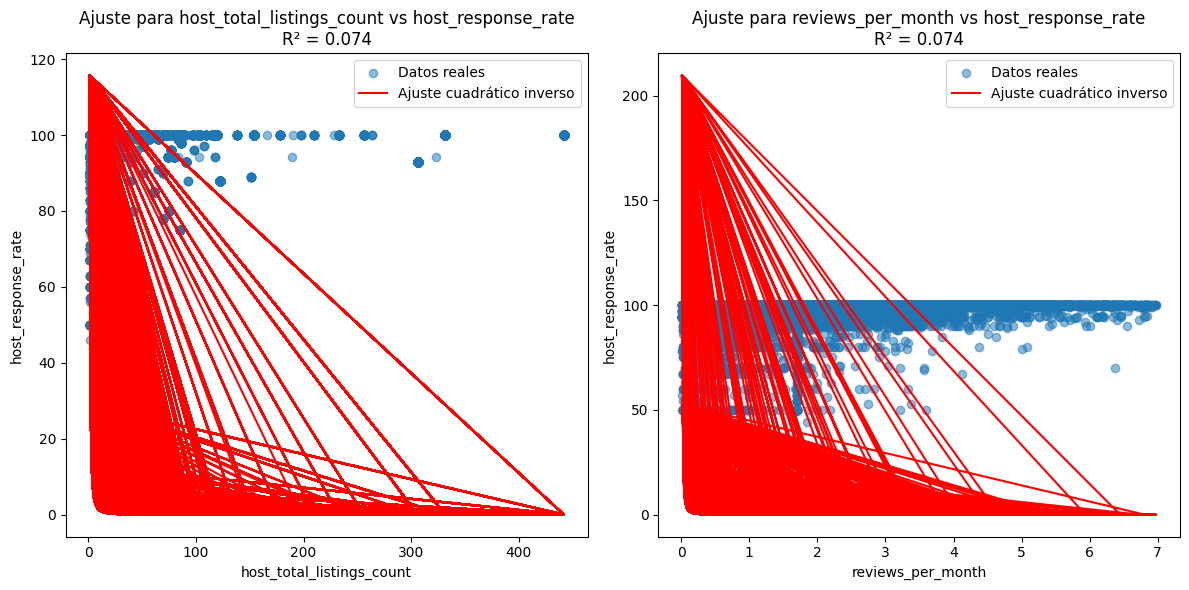

In [177]:
# Graficar los dos mejores modelos de la función cuadrática inversa
plt.figure(figsize=(12, 6))

# Obtener los dos mejores modelos
mejores_modelos10 = df_resultados10.head(2)

# Usar enumerate para obtener el índice correcto para las subgráficas
for i, (index, row) in enumerate(mejores_modelos10.iterrows()):
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    a = row['a']

    x = Mexico_outliers[var1]
    y = Mexico_outliers[var2]
    yfit10 = func_cuadratica_inversa(x, a)

    plt.subplot(1, 2, i + 1)  # Usar i para la subgráfica
    plt.scatter(x, y, label='Datos reales', alpha=0.5)
    plt.plot(x, yfit10, color='red', label='Ajuste cuadrático inverso')
    plt.title(f'Ajuste para {var1} vs {var2}\nR² = {row["R²"]:.3f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()

plt.tight_layout()
plt.show()

REGRESION NO LINEAL POLINOMIAL INVERSA

In [178]:
# Definir la función polinomial inversa
def func_polinomial_inversa(x, a, b, c):
    return a / (x**2 + b * x + 1e-7) + c  # Evitar división por cero

# Lista para almacenar los resultados
resultados11 = []

# Calcular y mostrar la regresión no lineal para cada par de variables
for var1, var2 in variables:
    x = Mexico_outliers[var1]
    y = Mexico_outliers[var2]

    # Ajustar el modelo no lineal
    parametros11, _ = curve_fit(func_polinomial_inversa, x, y)
    a, b, c = parametros11
    yfit11 = func_polinomial_inversa(x, a, b, c)

    # Calcular el coeficiente de determinación
    R2_11 = r2_score(y, yfit11)

    # Almacenar los resultados en la lista
    resultados11.append((var1, var2, a, b, c, R2_11))

# Crear un DataFrame a partir de los resultados
df_resultados11 = pd.DataFrame(resultados11, columns=['Variable 1', 'Variable 2', 'a', 'b', 'c', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados11 = df_resultados11.sort_values(by='R²', ascending=False)

# Mostrar la tabla
df_resultados11

C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_33224\2595313742.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros11, _ = curve_fit(func_polinomial_inversa, x, y)
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_33224\2595313742.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros11, _ = curve_fit(func_polinomial_inversa, x, y)
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_33224\2595313742.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros11, _ = curve_fit(func_polinomial_inversa, x, y)
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_33224\2595313742.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros11, _ = curve_fit(func_polinomial_inversa, x, y)
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_33224\2595313742.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros11, _ = curve_fit(func_polinomial_inversa, x, y)


,Variable 1,Variable 2,a,b,c,R²
14,host_total_listings_count,host_acceptance_rate,2.565229e+03,-8.082518e+01,92.084928,1.137827e-01
16,accommodates,price,-7.403692e+06,4.832685e+03,1991.304686,9.936326e-02
22,reviews_per_month,host_acceptance_rate,8.667377e+03,-7.781681e+03,83.732511,5.797206e-02
0,host_response_rate,host_acceptance_rate,6.351003e+08,-1.005262e+05,146.271270,4.304868e-02
18,accommodates,host_acceptance_rate,4.307910e+02,-1.626891e+01,94.073317,3.236429e-02
15,accommodates,reviews_per_month,-1.862878e+00,1.398977e+00,1.812593,2.684688e-02
3,host_response_rate,reviews_per_month,-7.264344e+06,4.669573e+04,3.186069,1.794983e-02
17,accommodates,host_response_rate,3.079124e+03,-1.121902e+03,98.244293,9.551108e-03
11,host_total_listings_count,reviews_per_month,-5.068057e+03,1.480504e+04,1.692715,8.634005e-03
7,host_acceptance_rate,reviews_per_month,-6.654291e-08,6.312486e+01,1.596924,8.394603e-03


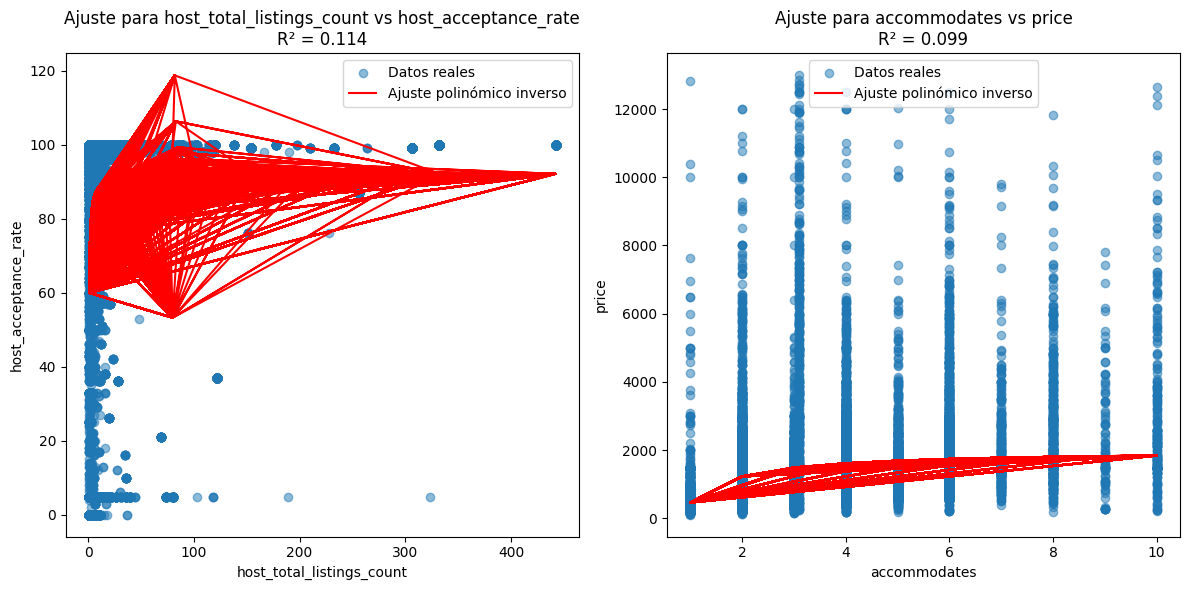

In [179]:
# Graficar los dos mejores modelos de la función polinomial inversa
plt.figure(figsize=(12, 6))

# Obtener los dos mejores modelos
mejores_modelos11 = df_resultados11.head(2)

# Usar enumerate para obtener el índice correcto para las subgráficas
for i, (index, row) in enumerate(mejores_modelos11.iterrows()):
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    a, b, c = row['a'], row['b'], row['c']

    x = Mexico_outliers[var1]
    y = Mexico_outliers[var2]
    yfit11 = func_polinomial_inversa(x, a, b, c)

    plt.subplot(1, 2, i + 1)  # Usar i para la subgráfica
    plt.scatter(x, y, label='Datos reales', alpha=0.5)
    plt.plot(x, yfit11, color='red', label='Ajuste polinómico inverso')
    plt.title(f'Ajuste para {var1} vs {var2}\nR² = {row["R²"]:.3f}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()

plt.tight_layout()
plt.show()

In [180]:
# Crear listas para almacenar resultados de cada modelo
resultados_totales = []

# Agregar resultados de cada modelo
for resultados, nombre_modelo in zip(
    [resultados,resultados2,resultados3,resultados4,resultados5, resultados6, resultados7, resultados8, resultados9, resultados10, resultados11],
    ['Cuadratica','Exponencial','Inversa','Senoidal', 'Tangencial', 'Valor Absoluto', 'Cociente Polinómico', 'Logarítmica', 'Lineal Producto', 'Cuadrática Inversa', 'Polinomial Inversa']
):
    for res in resultados:
        # Agregar tipo de función y variables a la lista
        # res[-1] contiene R², y res[0], res[1] contienen las variables
        resultados_totales.append((nombre_modelo, res[0], res[1], res[-1]))  # modelo, variable1, variable2, R²

# Crear un DataFrame a partir de todos los resultados
df_resultados_totales = pd.DataFrame(resultados_totales, columns=['Tipo de Función', 'Variable 1', 'Variable 2', 'R²'])

# Ordenar el DataFrame por R² de mayor a menor
df_resultados_totales = df_resultados_totales.sort_values(by='R²', ascending=False)

# Reiniciar el índice para que comience en 1
df_resultados_totales.reset_index(drop=True, inplace=True)
df_resultados_totales.index += 1  # Iniciar la numeración desde 1

# Mostrar la tabla
df_resultados_totales

,Tipo de Función,Variable 1,Variable 2,R²
1,Senoidal,host_response_rate,host_acceptance_rate,1.602486e-01
2,Cuadratica,accommodates,price,1.312428e-01
3,Valor Absoluto,accommodates,price,1.312428e-01
4,Exponencial,accommodates,price,1.312412e-01
5,Logarítmica,accommodates,price,1.251169e-01
...,...,...,...,...
271,Exponencial,host_total_listings_count,host_response_rate,-4.806019e+63
272,Exponencial,host_total_listings_count,reviews_per_month,-1.299470e+65
273,Exponencial,host_total_listings_count,host_acceptance_rate,-1.294917e+260
274,Exponencial,host_total_listings_count,accommodates,-7.972914e+268
